# Analysing the Impact of Agricultural CO2 emissions on Climate Change


<div id="agriculture", align="center">

  <img src="agriculture.jpg" width="1000" height="500" alt=""/>

</div>

## Table of Contents

- <b> [1. Project Overview](#1-project-overview)
    - [1.1. Introduction](#11-introduction)
    - [1.2. Objective](#12-objective)
- <b> [2. Importing Packages](#2-importing-packages)
- <b> [3. Data Loading and Inspection](#3-data-loading-and-inspection)
- <b> [4. Data Cleaning](#4-data-cleaning)
- <b> [5. Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis)
- <b> [6. Feature Engineering](#6-feature-engineering)</b>
- <b> [7. Model Development](#7-model-development)</b>
- <b> [8. Model Performance](#8-model-performance)
- <b> [9. Conclusion and Insights](#9-conclusion-and-recommendations)</b>


## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>

Climate change is a global issue that has significant ramifications on the environment. It a weather phenomenon defined as the long-term significant shift in weather and temperature conditions. It is caused by greenhouse gas emissions that trap the sun's heat, typically carbon dioxide (CO2) or methane (CH4), which results in global temperature upsurges. Various industries and sectors contribute to global emissions. The agricultural sector is responsible for a third of these emissions as one of the leading sources of CO2 emissions and biodiversity loss. The investigation and comprehension of the effect the sector has on climate change trends is paramount for devising effective mitigation strategies and implementing sustainable agricultural practices. Such strategies and practises may include agroforestry, crop rotation, biodynamic agriculture and Renewanble energy integration. 

The main objective of this project is to investigate and comprehend the impact of agricultural activities on climate change. This is fulfilled by analysing and predicting the effect of various CO2 emission sources on climate change. Consequently, uncovering underlying patterns and key insights to inform strategy development. The analyses is conducted using data retrieved from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC) for various countries/areas. The dataset comprises of the average temperature variations in Celcius (&deg;C), the carbon dioxide emissions from several sources and the total emissions  in kilotonnes (kt) for the year 1990 to 2020. Climate change is represented as the trend in temperature variations observed in an area. A higher variation denotes extreme climate change, whereas a lower variation indicates a stable climate. The variation can either be positive or negative, describing a warming and cooling climate repectively. The CO2 sources are given as:
*   Savanna fires 
*   Forest fires 
*   Crop Residues
*   Rice Cultivation
*   Drained organic soils (CO2)
*   Pesticides Manufacturing
*   Food Transport
*   Forestland
*   Net Forest conversion
*   Food Household Consumption
*   Food Retail
*   On-farm Electricity Use
*   Food Packaging
*   Agrifood Systems Waste Disposal
*   Food Processing
*   Fertilizers Manufacturing
*   IPPU
*   Manure applied to Soils
*   Manure Management
*   Fires in organic soils
*   Fires in humid tropical forests
*   On-farm energy use
*   Rural population
*   Urban population
*   Total Male Population
*   Total Female Population

A thorough data analysis procedure is employed, followed by regression predictive modelling. The procedure is embedded in the structure of this notebook. The notebook consists of several sections and exploits python's extensive capabilities by utilizing regression, data analysis and visulisation libraries. The first section imports python packages essential for analysis. The data loading section loads and inspects the dataset for errors and/or data consistencies. The subsequent section cleans the dataset by handling the errors and data consistencies found, preparing it for analysis. The exploratory data analysis section draws valuable insights from the dataset using statistical techniques and data visualisations. In the feature engineering section, the dataset is prepared for regression modelling. The predictive model is developed and evaluated in the model development and model performance sections accordingly. The insights gathered from both analyses will highlight the impact of agricultural activities on climate change and will be reviewed in the conclusions and recommendation section. Here suitable mitigation strategies are discussed at length and recommended to the stakeholders for implementation. 


### 1.2 Objective <a class="anchor" id="section_1_2"></a>

The key objectives are defined as follows:

*   To perform exploratory data analysis on the agricultural emissions dataset.
*   To identify the relationship between CO2 emmisions and temperature variations.
*   To identify and describe the global trend for climate change.
*   To identify emission sources that are significant contributors of CO2 emissions and have major influence on temperature variations.
*   To perform regression analysis on the agricultural emissions dataset.
*   To develop a regression model to predict temperature variations.
*   To offer actionable insights to agricultural stakeholders including policymakers and agricultural organisations.


## 2. Importing Packages <a class="anchor" id="chapter2"></a>

In this segment, the library packages necessary for data analysis and regression analysis are imported. The main libraries are:
*   <b>*Pandas:*</b> Stores data in DataFrames and facilitates data manipulation and analysis.
*   <b>*Numpy:*</b> Assists in data manipulation by supporting numerical computations on data array.
*   <b>*Matplotlib:*</b> Used to create static and interactive data visualisations.
*   <b>*Seaborn:*</b>  Builds upon the matplotlib library by creating visually appealing data visualisations.
*   <b>*Sklearn:*</b> Used to build and evaluate machine learning models.

The `%matplotlib inline` line ensure the figures generated by matplotlib are placed within the notebook. Additionally, the warnings library is imported for the supression of raised warnings. This is to avoid  unneccessary interruptions during code execution. 


In [16]:
## Libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Libraries for regression analysis
from sklearn.model_selection import train_test_split  #Splits dataframe into training and testing set
from sklearn.preprocessing import StandardScaler #Scales data

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  #Various linear regression model regressors
from sklearn.tree import DecisionTreeRegressor #Decision tree regressor

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,  AdaBoostRegressor #Ensemble methods regressors

from sklearn.metrics import mean_squared_error, r2_score    #Evaluates model evaluation

## Displays output inline
%matplotlib inline

## Libraries for Handing Warnings
import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading and Inspection <a class="anchor" id="chapter3"></a>

*Brief section introduction

In [17]:
#reading the dataset into a dataframe
df = pd.read_csv('co2_emissions_from_agri.csv')
#display first five columns of dataframe
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


*   **Savanna fires:** Emissions from fires in savanna ecosystems.
*   **Forest fires:** Emissions from fires in forested areas.
*   **Crop Residues:** Emissions from burning or decomposing leftover plant material after crop harvesting.
*   **Rice Cultivation:** Emissions from methane released during rice cultivation.
*   **Drained organic soils (CO2):** Emissions from carbon dioxide released when draining organic soils.
*   **Pesticides Manufacturing:** Emissions from the production of pesticides.
*   **Food Transport:** Emissions from transporting food products.
*   **Forestland:** Land covered by forests.
*   **Net Forest conversion:** Change in forest area due to deforestation and afforestation.
*   **Food Household Consumption:** Emissions from food consumption at the household level.
*   **Food Retail:** Emissions from the operation of retail establishments selling food.
*   **On-farm Electricity Use:** Electricity consumption on farms.
*   **Food Packaging:** Emissions from the production and disposal of food packaging materials.
*   **Agrifood Systems Waste Disposal:** Emissions from waste disposal in the agrifood system.
*   **Food Processing:** Emissions from processing food products.
*   **Fertilizers Manufacturing:** Emissions from the production of fertilizers.
*   **IPPU:** Emissions from industrial processes and product use.
*   **Manure applied to Soils:** Emissions from applying animal manure to agricultural soils.
*   **Manure left on Pasture:** Emissions from animal manure on pasture or grazing land.
*   **Manure Management:** Emissions from managing and treating animal manure.
*   **Fires in organic soils:** Emissions from fires in organic soils.
*   **Fires in humid tropical forests:** Emissions from fires in humid tropical forests.
*   **On-farm energy use:** Energy consumption on farms.
*   **Rural population:** Number of people living in rural areas.
*   **Urban population:** Number of people living in urban areas.
*   **Total Population - Male:** Total number of male individuals in the population.
*   **Total Population - Female:** Total number of female individuals in the population.
*   **total_emission:** Total greenhouse gas emissions from various sources.
*   **Average Temperature °C:** The average increasing or decreasing of temperature (by year) in degrees Celsius

CO2 is recorded in kilotonnes (kt) and  1 kt represents 1000 kg of CO2.

## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

*Brief section introduction

In [18]:
#renaming features to adhere to python naming standards
df= df.rename(columns = {'Average Temperature °C' : 'average_temperature_change', 'Total Population - Female' : 'female_population', 'Total Population - Male':'male_population', 'Urban population': 'urban_population', 'Rural population':'rural_population', 'On-farm energy use' : 'on_farm_energy_use' , 'Fires in humid tropical forests' : 'fires_in_humid_tropical_forests'
                         ,'Fires in organic soils' : 'fires_in_organic_soils', 'Manure Management' : 'manure_management', 'Manure left on Pasture': 'manure_left_on_pasture', 'Manure applied to Soils' : 'manure_applied_to_soils','Fertilizers Manufacturing' : 'fertilizers_manufacturing', 'Food Processing' : 'food_processing', 'Agrifood Systems Waste Disposal' : 'agrifood_systems_waste_disposal'
                         ,'Food Packaging' :'food_packaging', 'On-farm Electricity Use': 'on_farm_electricity_use', 'Food Retail' : 'food_retail' , 'Food Household Consumption' : 'food_household_consumption' , 'Net Forest conversion' : 'net_forest_conversion', 'Forestland': 'forestland', 'Food Transport' : 'food_transport', 'Pesticides Manufacturing' : 'pesticides_manufacturing'
                         ,'Drained organic soils (CO2)': 'drained_organic_soils', 'Rice Cultivation' : 'rice_cultivation', 'Crop Residues':'crop_residues', 'Forest fires':'forest_fires', 'Savanna fires': 'savanna_fires', 'Area' :'area', 'Year' : 'year'})

df.head()                     

,area,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils,pesticides_manufacturing,food_transport,forestland,...,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on_farm_energy_use,rural_population,urban_population,male_population,female_population,total_emission,average_temperature_change
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [19]:
#Checking for null values per column
print("Null Values in each column:")
print(df.isnull().sum())

Null Values in each column:
area                                  0
year                                  0
savanna_fires                        31
forest_fires                         93
crop_residues                      1389
rice_cultivation                      0
drained_organic_soils                 0
pesticides_manufacturing              0
food_transport                        0
forestland                          493
net_forest_conversion               493
food_household_consumption          473
food_retail                           0
on_farm_electricity_use               0
food_packaging                        0
agrifood_systems_waste_disposal       0
food_processing                       0
fertilizers_manufacturing             0
IPPU                                743
manure_applied_to_soils             928
manure_left_on_pasture                0
manure_management                   928
fires_in_organic_soils                0
fires_in_humid_tropical_forests     155
on_farm_ener

In [20]:
#Replacing Missing Values with zero
df[['savanna_fires', 'forest_fires', 'crop_residues', 'forestland', 'net_forest_conversion', 'food_household_consumption', 'IPPU','manure_applied_to_soils','manure_management', 'fires_in_humid_tropical_forests', 'on_farm_energy_use']] = df[['savanna_fires', 'forest_fires', 'crop_residues', 'forestland', 'net_forest_conversion', 'food_household_consumption', 'IPPU','manure_applied_to_soils','manure_management', 'fires_in_humid_tropical_forests', 'on_farm_energy_use']].fillna(0)

The empty cells are specific to specific areas, hence their replacement with zero

In [21]:
#Checking for duplicates
print("Number of duplicated rows: ")
print(df.duplicated().sum())

Number of duplicated rows: 
0


*Insights/comments

## 5. Exploratory Data Analysis <a class="anchor" id="chapter5"></a>

In this analysis, we will explore the relationship between various factors affecting emissions, temperature, and other environmental variables. The dataset provided includes emissions data for different areas and years, including factors like crop residues, food consumption, transportation, and fertilizers manufacturing. Our objective is to visualize these relationships through various statistical and graphical methods.

**Correlation Matrix Heatmap**

We begin by examining the correlations between various variables to understand how they relate to each other.

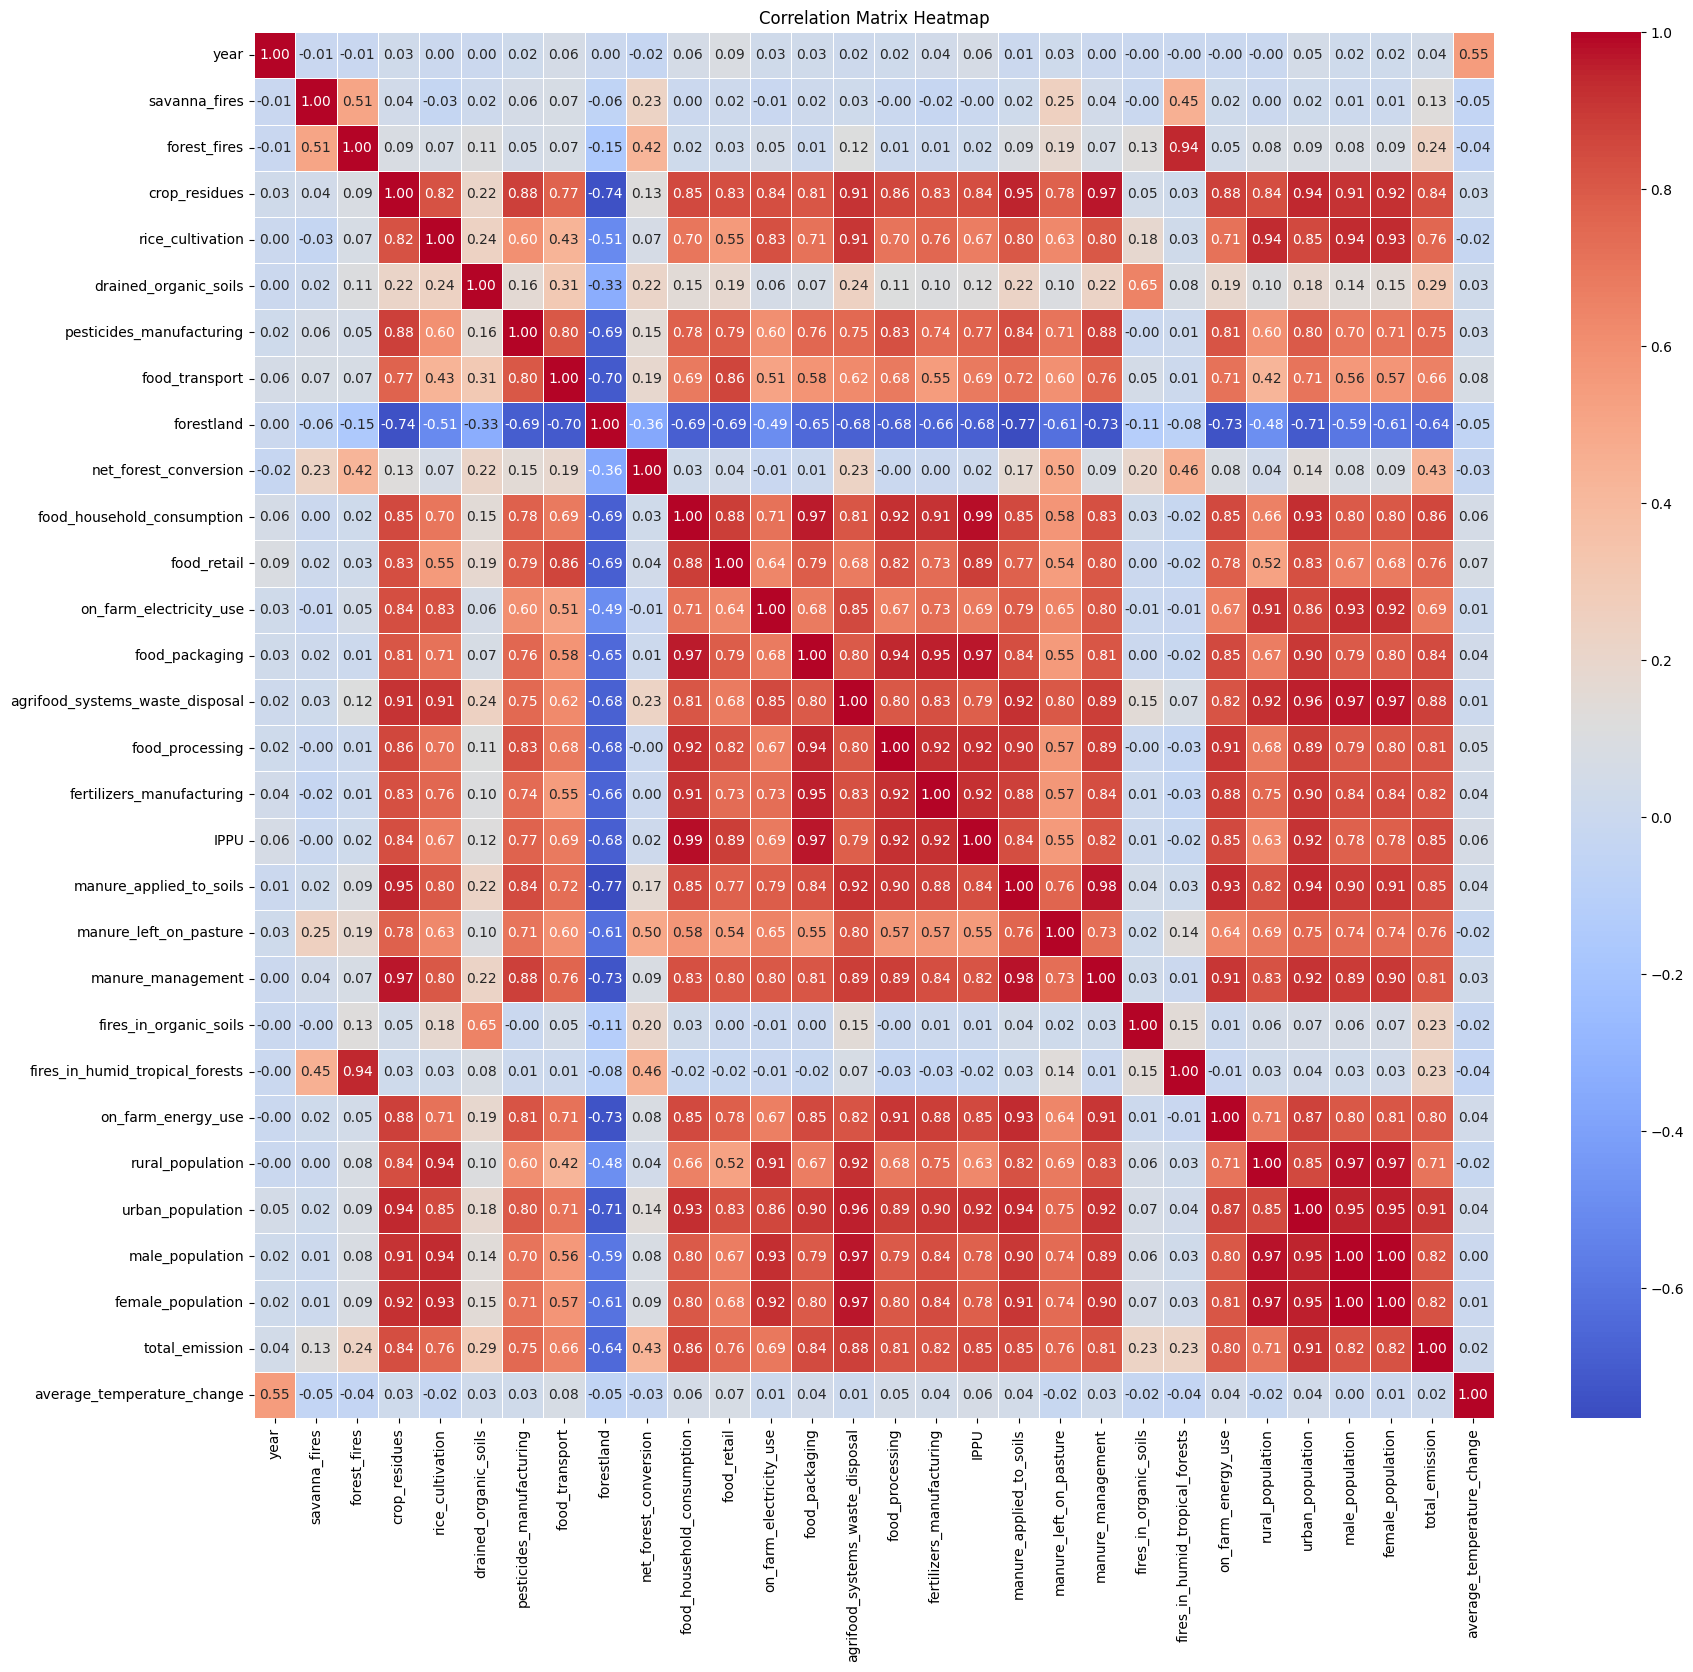

In [22]:
# Dropping the 'Area' column and calculating the correlation matrix
ndf = df.drop('area', axis=1)
correlation_matrix = ndf.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Adding title and showing the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

**Grouping Data by Year**

We aggregate the data by 'Year' to observe trends in total emissions, temperature, and other environmental variables over time.

In [23]:
# Grouping data by 'year' and aggregating key environmental factors
df_grouped_by_year = df.groupby('year').agg({
    'total_emission': 'sum',  # Total emissions across all areas for each year
    'average_temperature_change': 'mean',  # Average temperature change for each year
    'crop_residues': 'sum',
    'food_household_consumption': 'sum',
    'rice_cultivation': 'sum',
    'food_transport': 'sum',
    'food_retail': 'sum',
    'fertilizers_manufacturing': 'sum',
    'manure_management': 'sum',
}).reset_index()

# Displaying the first few rows of the grouped data
df_grouped_by_year.head()


,year,total_emission,average_temperature_change,crop_residues,food_household_consumption,rice_cultivation,food_transport,food_retail,fertilizers_manufacturing,manure_management
0,1990,1.108960e+07,0.582551,153165.9719,543237.6491,929823.919130,317837.864552,273178.600825,557482.164606,432661.4088
1,1991,1.127168e+07,0.317404,148557.7382,562803.3241,930480.142397,326979.000938,279894.519092,564503.720800,435483.0648
2,1992,1.116467e+07,0.280593,153469.1554,605152.1641,939513.173286,329402.513986,259087.055422,516099.286025,430599.3615
3,1993,1.126050e+07,0.256079,151020.0042,634222.0539,924193.393558,331280.768609,244135.564583,511923.214923,430461.6858
4,1994,1.149128e+07,0.593787,152670.0648,640391.0842,927782.202763,330295.753344,268669.140613,528775.329772,434603.0759


**Grouping Data by Area**

Next, we group the data by 'Area' to aggregate total emissions, average temperature, and other environmental factors.

In [24]:
# Grouping data by 'area' and aggregating key environmental factors
df_grouped = df.groupby(['area']).agg({
    'total_emission': 'sum',  # Total emissions per area
    'average_temperature_change': 'mean',  # Average temperature per area
    'crop_residues': 'sum',
    'food_household_consumption': 'sum',
    'rice_cultivation': 'sum',
    'food_transport': 'sum',
    'food_retail': 'sum',
    'fertilizers_manufacturing': 'sum',
    'manure_management': 'sum',
}).reset_index()

# Displaying the first few rows of the grouped data
df_grouped.head()


,area,total_emission,average_temperature_change,crop_residues,food_household_consumption,rice_cultivation,food_transport,food_retail,fertilizers_manufacturing,manure_management
0,Afghanistan,2.279756e+05,0.817043,9819.2319,14459.7521,20235.337900,6408.9547,7066.8167,806.325400,19199.4043
1,Albania,1.145863e+05,0.886694,1157.2945,2623.6036,6467.964319,6195.0131,1767.0316,24310.994250,16190.1084
2,Algeria,1.253680e+06,1.164661,8670.6486,410561.1088,76.322300,83495.3107,14091.4539,30753.390600,8955.2133
3,American Samoa,1.704418e+05,0.850089,0.0000,19.5893,35912.514945,442.9593,192.6394,62179.556001,0.0000
4,Andorra,1.639142e+05,1.283871,0.0000,79.4413,28716.610633,1215.5238,113.2134,51591.979136,0.0000


**Trend of Total Emissions Over Time**

We plot the trend of total emissions over time using a line plot.

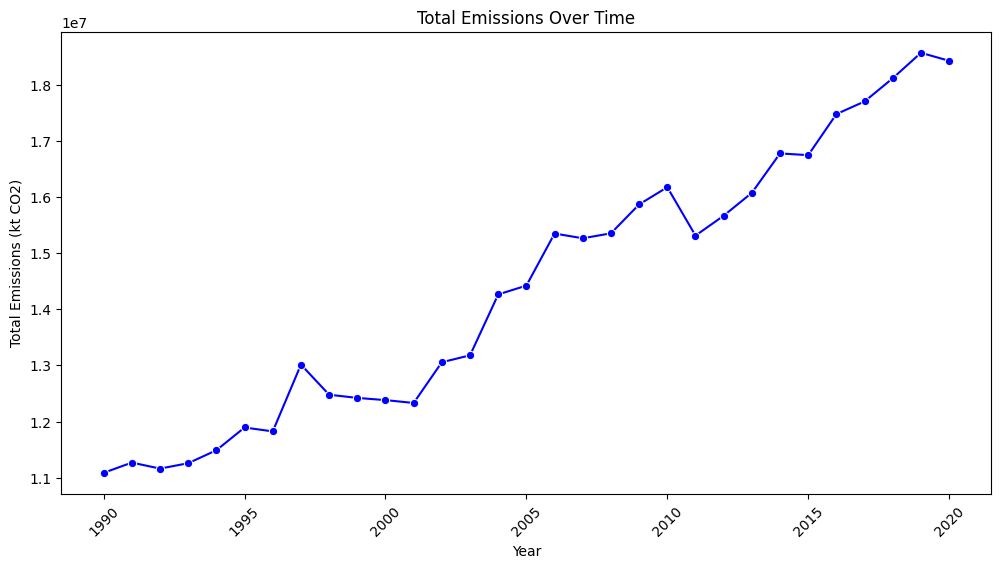

In [25]:
# Plotting total emissions over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_by_year, x='year', y='total_emission', marker='o', color='blue')

# Adding title and labels
plt.title('Total Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Emissions (kt CO2)')
plt.xticks(rotation=45)
plt.show()


**Trend of Average Temperature Over Time**

Similarly, we plot the trend of average temperature increase over time using a line plot.

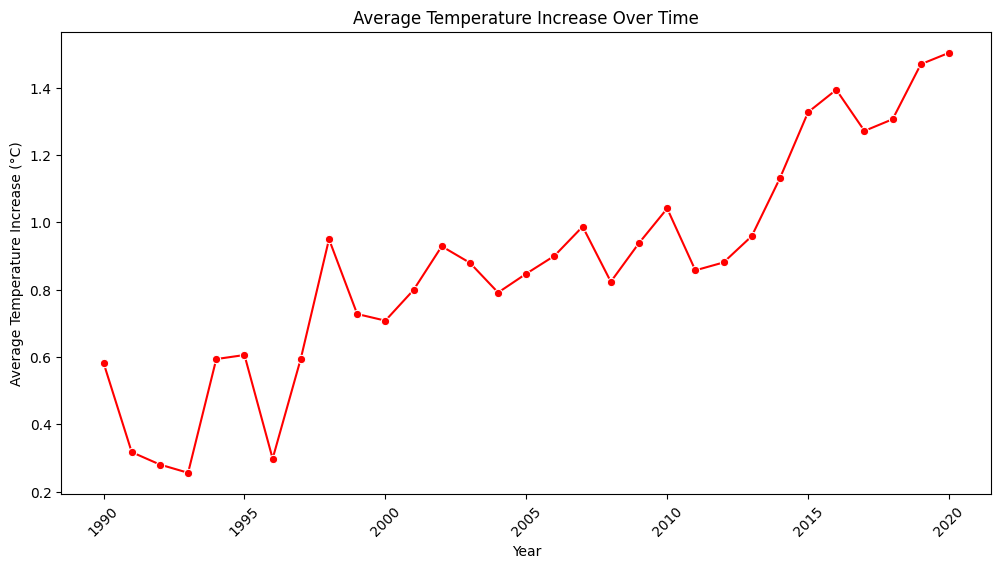

In [26]:
# Plotting average temperature increase over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_by_year, x='year', y='average_temperature_change', marker='o', color='red')

# Adding title and labels
plt.title('Average Temperature Increase Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature Increase (°C)')
plt.xticks(rotation=45)
plt.show()


**Grouping Data by Year and Area**

We now group the data by both 'Year' and 'Area' to analyze emissions and temperature trends in each area over time.

In [27]:
# Grouping data by 'year' and 'area' and aggregating key environmental factors
df_grouped_by_year_area = df.groupby(['year', 'area']).agg({
    'total_emission': 'sum',  # Total emissions for each area and year
    'average_temperature_change': 'mean',  # Average temperature change for each area and year
    'crop_residues': 'sum',
    'food_household_consumption': 'sum',
    'rice_cultivation': 'sum',
    'food_transport': 'sum',
    'food_retail': 'sum',
    'fertilizers_manufacturing': 'sum',
    'manure_management': 'sum',
}).reset_index()

# Displaying the first few rows of the grouped data
df_grouped_by_year_area.head()


,year,area,total_emission,average_temperature_change,crop_residues,food_household_consumption,rice_cultivation,food_transport,food_retail,fertilizers_manufacturing,manure_management
0,1990,Afghanistan,2198.963539,0.536167,205.6077,79.0851,686.000000,63.1152,109.6446,11.997000,319.1763
1,1990,Albania,3475.291240,0.735750,59.2391,16.0124,23.520000,46.9645,8.3013,356.491017,474.6951
2,1990,Algeria,22326.596965,1.005583,164.2776,4907.6276,4.312000,1584.4410,433.8000,47.568300,225.2199
3,1990,American Samoa,5299.122499,0.566500,0.0000,0.5104,926.342278,16.9802,8.4872,2005.792129,0.0000
4,1990,Andorra,5576.553292,1.278500,0.0000,2.4928,926.342278,32.7588,3.0803,1664.257391,0.0000


**Stacked Bar Plot for Emissions by Source and Area Over Time**

We create a stacked bar plot to visualize the emissions by different sources across years and areas.

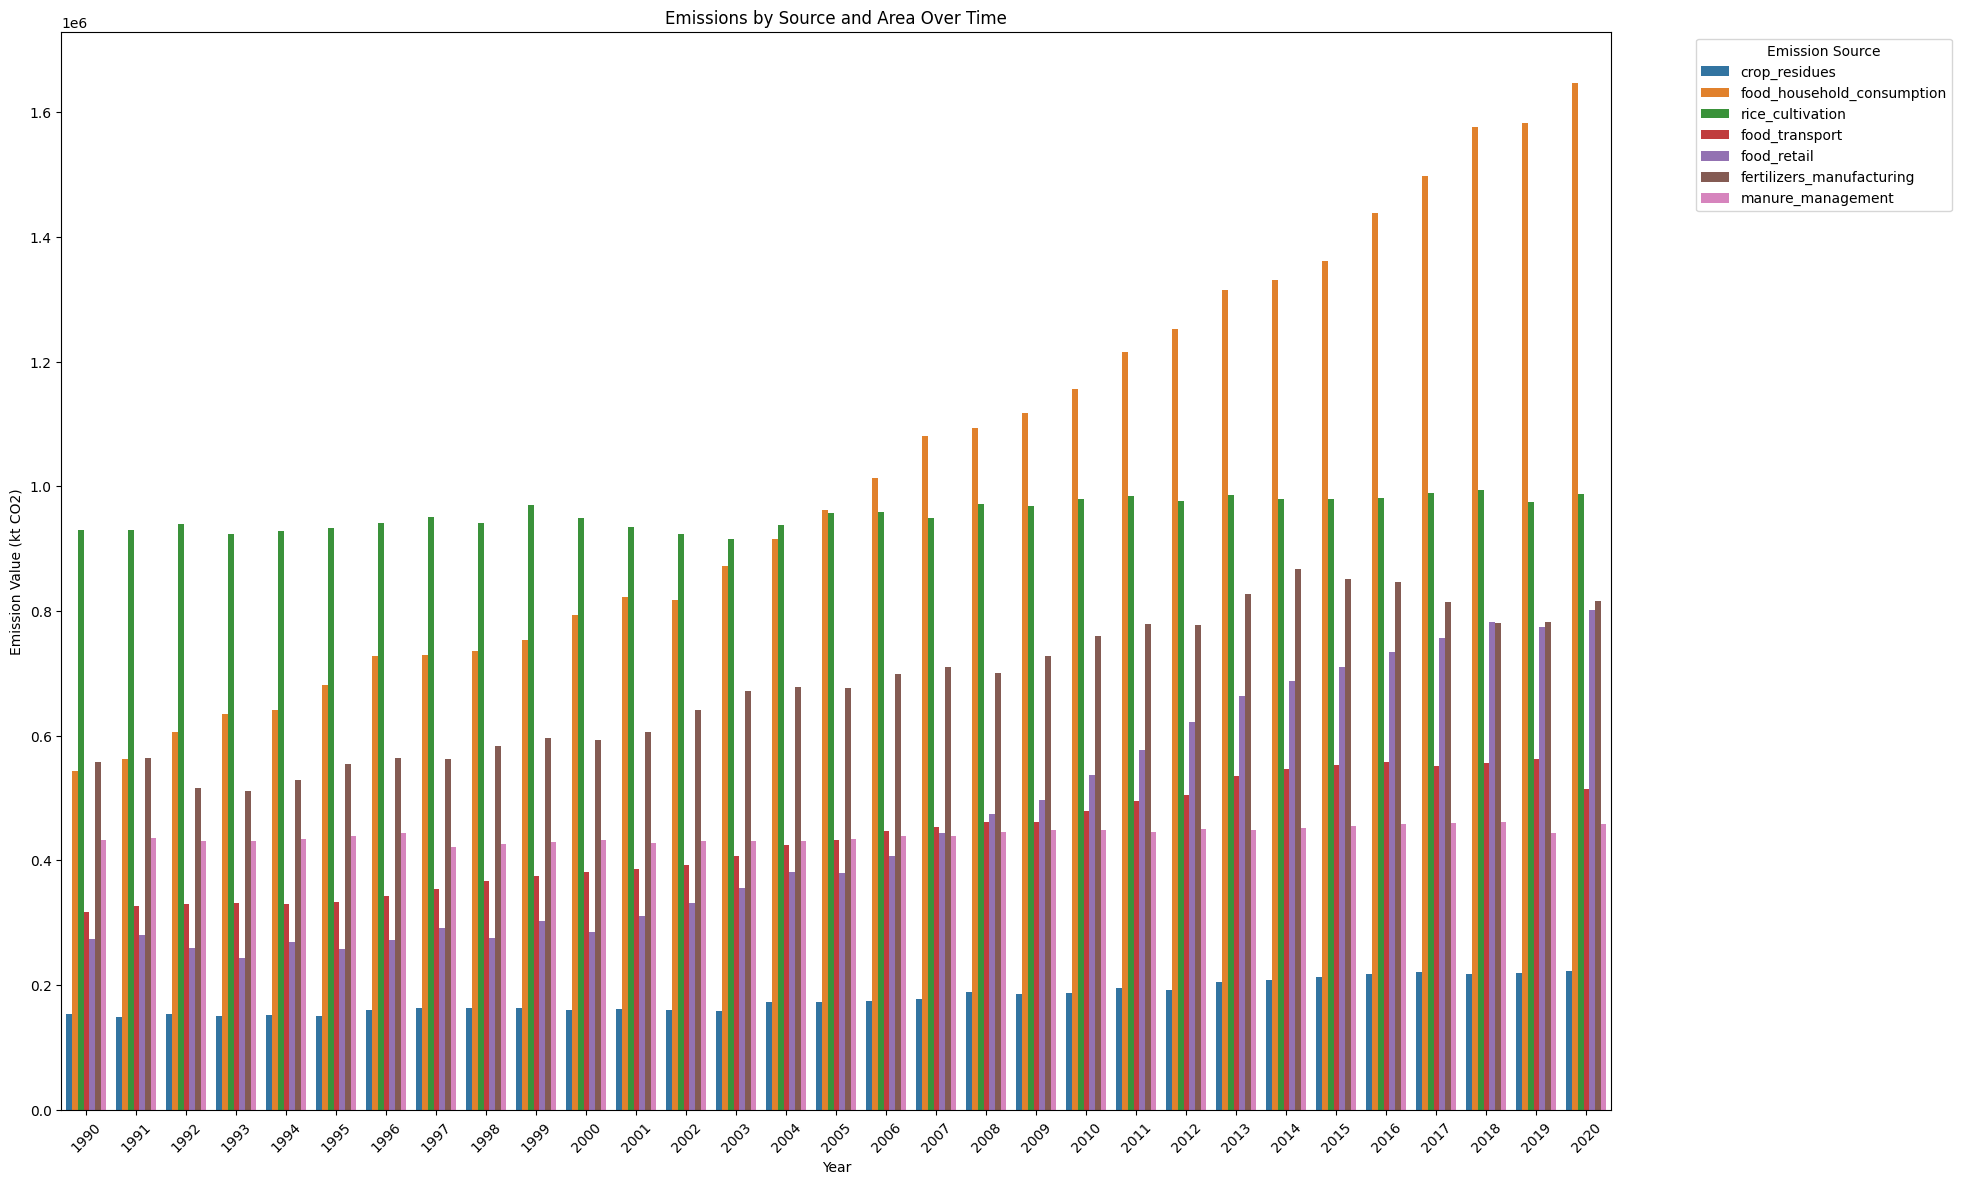

In [28]:
# Melting the data to reshape for stacked bar plot
df_melted = df_grouped_by_year_area.melt(id_vars=['year', 'area'], 
                                         value_vars=['crop_residues', 'food_household_consumption', 
                                                     'rice_cultivation', 'food_transport', 'food_retail', 
                                                     'fertilizers_manufacturing', 'manure_management'],
                                         var_name='Emission Source', value_name='Emission Value')

# Plotting a stacked bar plot
plt.figure(figsize=(20, 14))
sns.barplot(data=df_melted, x='year', y='Emission Value', hue='Emission Source', estimator='sum', errorbar=None)

# Adding title and labels
plt.title('Emissions by Source and Area Over Time')
plt.xlabel('Year')
plt.ylabel('Emission Value (kt CO2)')
plt.xticks(rotation=45)
plt.legend(title='Emission Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Total Emissions by Area**

We create a bar plot to visualize the total emissions by area.

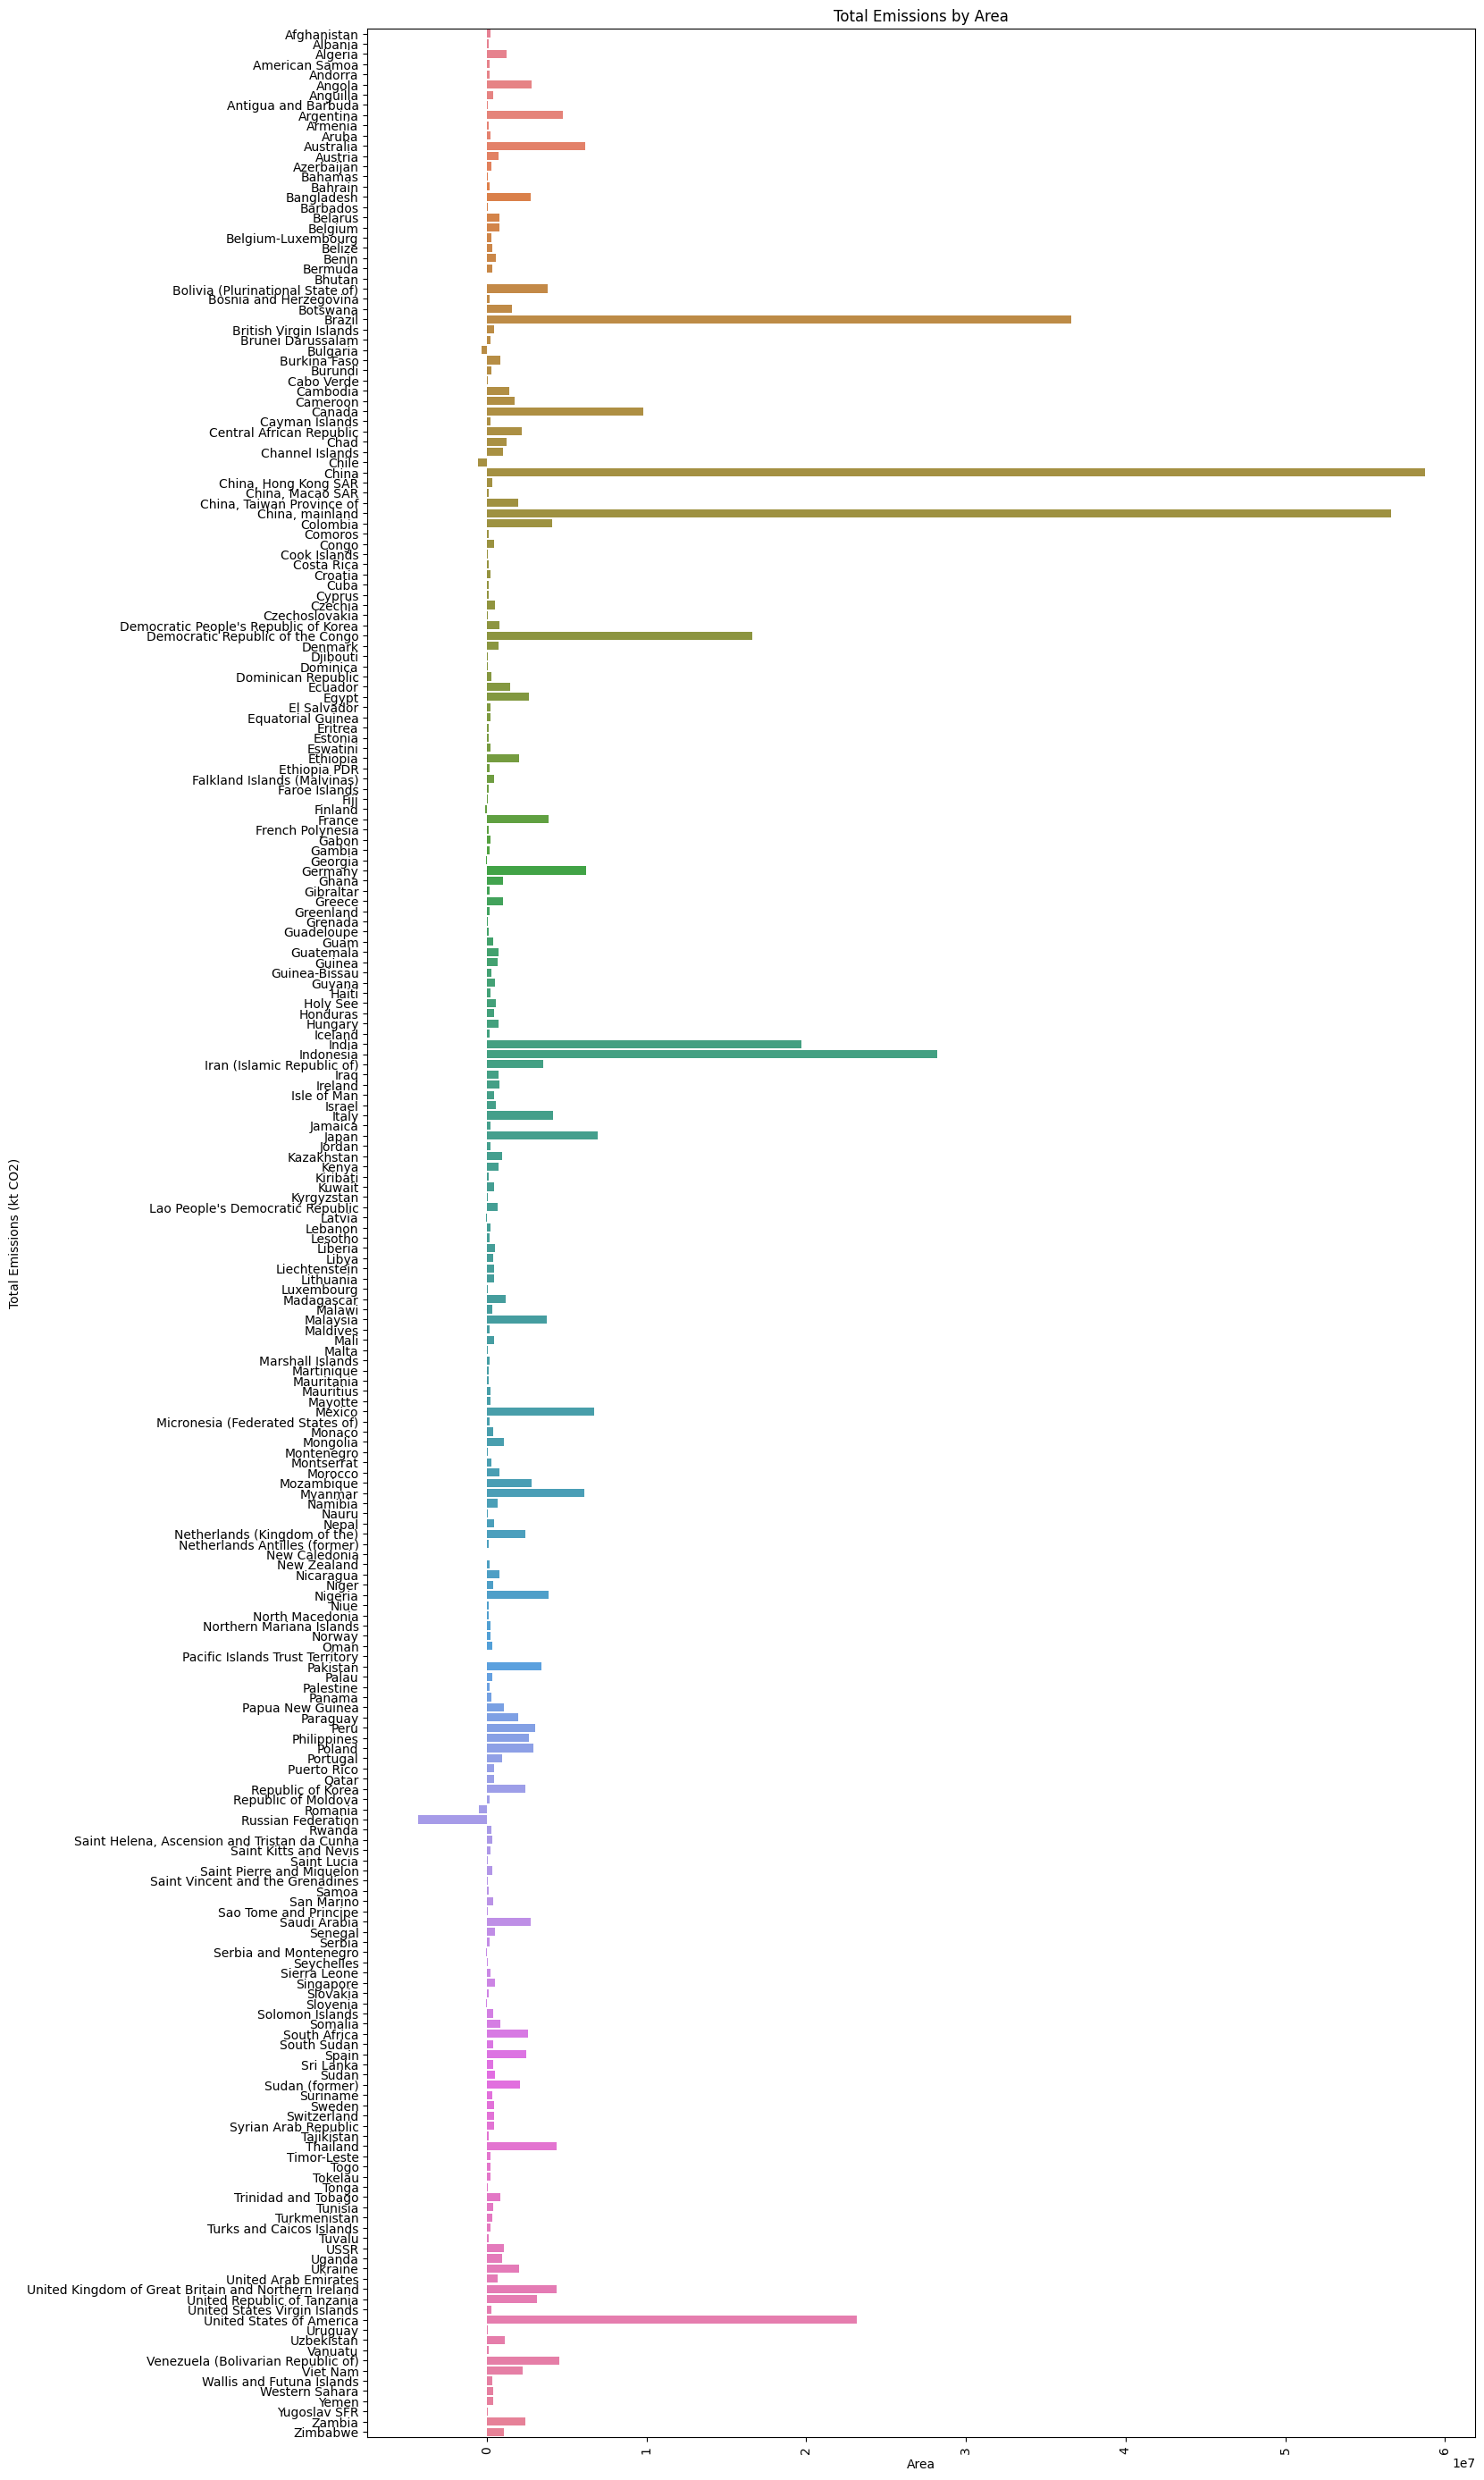

In [29]:
# Grouping data by 'area' and aggregating total emissions and other environmental factors
df_grouped_by_area = df.groupby(['area']).agg({
    'total_emission': 'sum',  # Total emissions per area
    'average_temperature_change': 'mean',  # Average temperature for each area
    'crop_residues': 'sum',
    'food_household_consumption': 'sum',
    'rice_cultivation': 'sum',
    'food_transport': 'sum',
    'food_retail': 'sum',
    'fertilizers_manufacturing': 'sum',
    'manure_management': 'sum',
}).reset_index()

# Plotting total emissions by area
plt.figure(figsize=(16, 35))
sns.barplot(data=df_grouped_by_area, x='total_emission', y='area', hue='area', legend=False)

# Adding title and labels
plt.title('Total Emissions by Area')
plt.xlabel('Area')
plt.ylabel('Total Emissions (kt CO2)')
plt.xticks(rotation=90)
plt.show()


**Choropleth Map for Emissions by Area**

Lastly, we visualize the total emissions by country using a choropleth map.

In [30]:
import geopandas as gpd

# Path to shapefile for world map
shapefile_path = "ne_110m_admin_0_countries"  # Update with correct path to shapefile

# Loading the shapefile
world = gpd.read_file(shapefile_path)

# Summing total emissions by area and merging with the world shapefile
df_map = df_grouped_by_year_area.groupby('area')['total_emission'].sum().reset_index()
world = world.merge(df_map, how="left", left_on="ADMIN", right_on="area")

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(25, 50))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='total_emission', ax=ax, legend=True,
           cmap='Blues',  # Using a color palette for the map
           legend_kwds={'label': "Total Emissions by Country",
                        'orientation': "horizontal"})

# Adding labels to the map
for idx, row in world.iterrows():
    ax.annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=6, color='black')

# Adding title and showing the plot
plt.title('Total Emissions by Area (Countries)', fontsize=16)
plt.show()


DataSourceError: ne_110m_admin_0_countries: No such file or directory

*Insights/comments

## 6. Feature Engineering <a class="anchor" id="chapter6"></a>

*Brief section introduction

*Insights

## 7. Model Development <a class="anchor" id="chapter7"></a>

*Brief section introduction

*Insights/comments

## 8. Model Performance <a class="anchor" id="chapter8"></a>

*Brief section introduction

*Insights/comments

## 9. Conclusion and Recommendations <a class="anchor" id="chapter9"></a>

*Summarise Insights
*Offer recommendations such as sustainable agricultural practices